In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline
train_data = pd.read_csv('train.csv')
train_data.head(20)
#print(train_data)


,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
5,6,1,20,50,0.169698,27.259866,0,12.867706
6,7,1,20,50,0.203708,27.127486,0,14.695562
7,8,1,20,50,0.237723,26.807732,0,15.890699
8,9,1,20,50,0.271776,27.864715,0,15.539188
9,10,1,20,50,0.305732,28.313036,0,15.750094


In [2]:
test_data = pd.read_csv('test.csv')
test_data.head(20)

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
5,6,0,5,20,0.159557,30.486938,0
6,7,0,5,20,0.191471,33.545950,0
7,8,0,5,20,0.223402,35.717600,0
8,9,0,5,20,0.255337,36.971061,0
9,10,0,5,20,0.287230,37.542219,0


# Classification with Artificial Neural Networks (ANN)
**Neural networks** are a powerful set of machine learning algorithms, used to solve a lot of challenging artificial intelligence problems. They often outperform traditional machine learning models because they have the advantages of non-linearity, variable interactions, and customizability. 

Neural network use one or more **hidden layers** of multiple **hidden units** to perform **function approximation**. The use of multiple hidden units in one or more layers, allows neural networks to approximate complex functions. Neural network models capable of approximating complex functions are said to have high **model capacity**. This property allows neural networks to solve complex machine learning problems. 

However, because of the large number of hidden units, neural networks have many **weights** or **parameters**. This situation often leads to **over-fitting** of neural network models, which limits generalization. Thus, finding optimal hyperparameters when fitting neural network models is essential for good performance. 

An additional issue with neural networks is **computational complexity**. Many optimization iterations are required. Each optimization iteration requires the update of a large number of parameters.  

In [3]:
# Import all required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Multi-layer Perceptron regressor.
from sklearn.neural_network import MLPRegressor
import numpy.random as nr

%matplotlib inline

In [4]:
X = train_data[['R','C','u_in','u_out']]
y = train_data['pressure']


Split the train dataset into train and test dataset. We have reserved 30% of the dataset for checking the accuracy of the trained model. Independent train and test dataset are further scaled to make sure that the input data is standard normally distributed are centred around zero and have variance in the same order.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=6, test_size=0.3)

“StandardScaler” to scale the data as different features( independent variables) have wide value range scale.

In [6]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

Three hidden layers are modelled, with 64 neurons in each layer. Considering the input and output layer, we have a total of 5 layers in the model. In addition to “RELU” activation, MLPRegressor supports the “sigmoid” and “hyperbolic tan” function.

In [7]:
ANN_model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=6, max_iter=2000).fit(X_trainscaled, y_train)

The trained model is used to predict the target values of the reserved test dataset, which model has not seen before.

## Model Evaluation
We will check the predicted score with the actual score to compute the accuracy of the model. 

In [8]:
from sklearn.metrics import r2_score
y_pred = ANN_model.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head()

The Score with  0.039768542140641405


,Actual,Predicted
2862611,4.431449,5.358132
376322,11.813174,20.838570
242389,4.501751,4.618092
1865932,11.039850,20.067803
222084,11.039850,16.678354


The accuracy of the model is approximately 0.66.

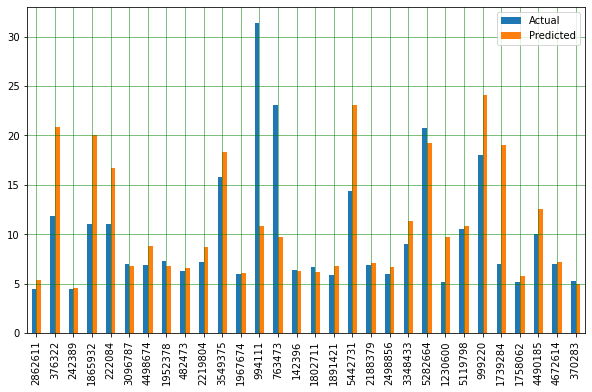

In [9]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

A bar chart is plotted to visualize the differences between the predicted data and actual data.

In [10]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.32022490794555
Mean Squared Error: 32.28359967301743
Root Mean Squared Error: 5.681865861934566


The Mean Absolute Error of the model is approximately **3.32**
The Mean Squared Error of the model is approximately **32.28**
The Root Mean Square Error of the model is approximately **5.68**

## Predict test data
The model is used to predict the pressure of the test dataset.

In [13]:
X_testscaleddata = sc_X.fit_transform(test_data[['R','C','u_in','u_out']])
pred_test = ANN_model.predict(X_testscaleddata)
pred_test_result = pd.DataFrame({'pressure':pred_test.reshape(-1)})
pred_test_result 

,pressure
0,15.328650
1,14.868625
2,17.374993
3,18.300611
4,18.817100
...,...
4023995,6.167157
4023996,6.166863
4023997,6.166615
4023998,6.166406
